# Peer-review Assignment for Data Visualization with Python

A survey was conducted to gauge an audience interest in different data science topics, namely:

- Big Data (Spark / Hadoop)
- Data Analysis / Statistics
- Data Journalism
- Data Visualization
- Deep Learning
- Machine Learning

The participants had three options for each topic: ***Very Interested, Somewhat interested, and Not interested***. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: *[Topic_Survey_Assignment](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Topic_Survey_Assignment.csv)*.


## Question 1

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

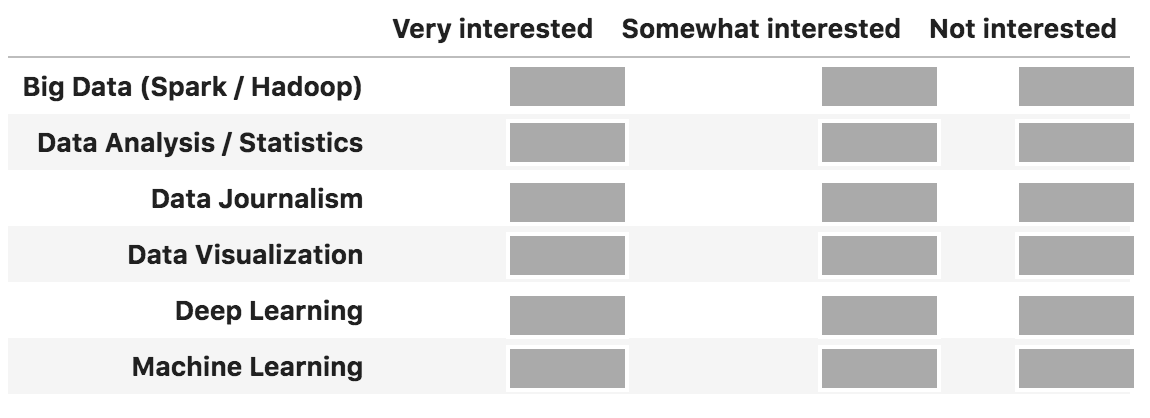

## Answer to Question 1

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

In [2]:
df_survey = pd.read_csv('https://drive.google.com/uc?export=download&id=1tOYN0yJoUaecXz8jZDePrVgLIlYb0Lj0')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_survey

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Question 2

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

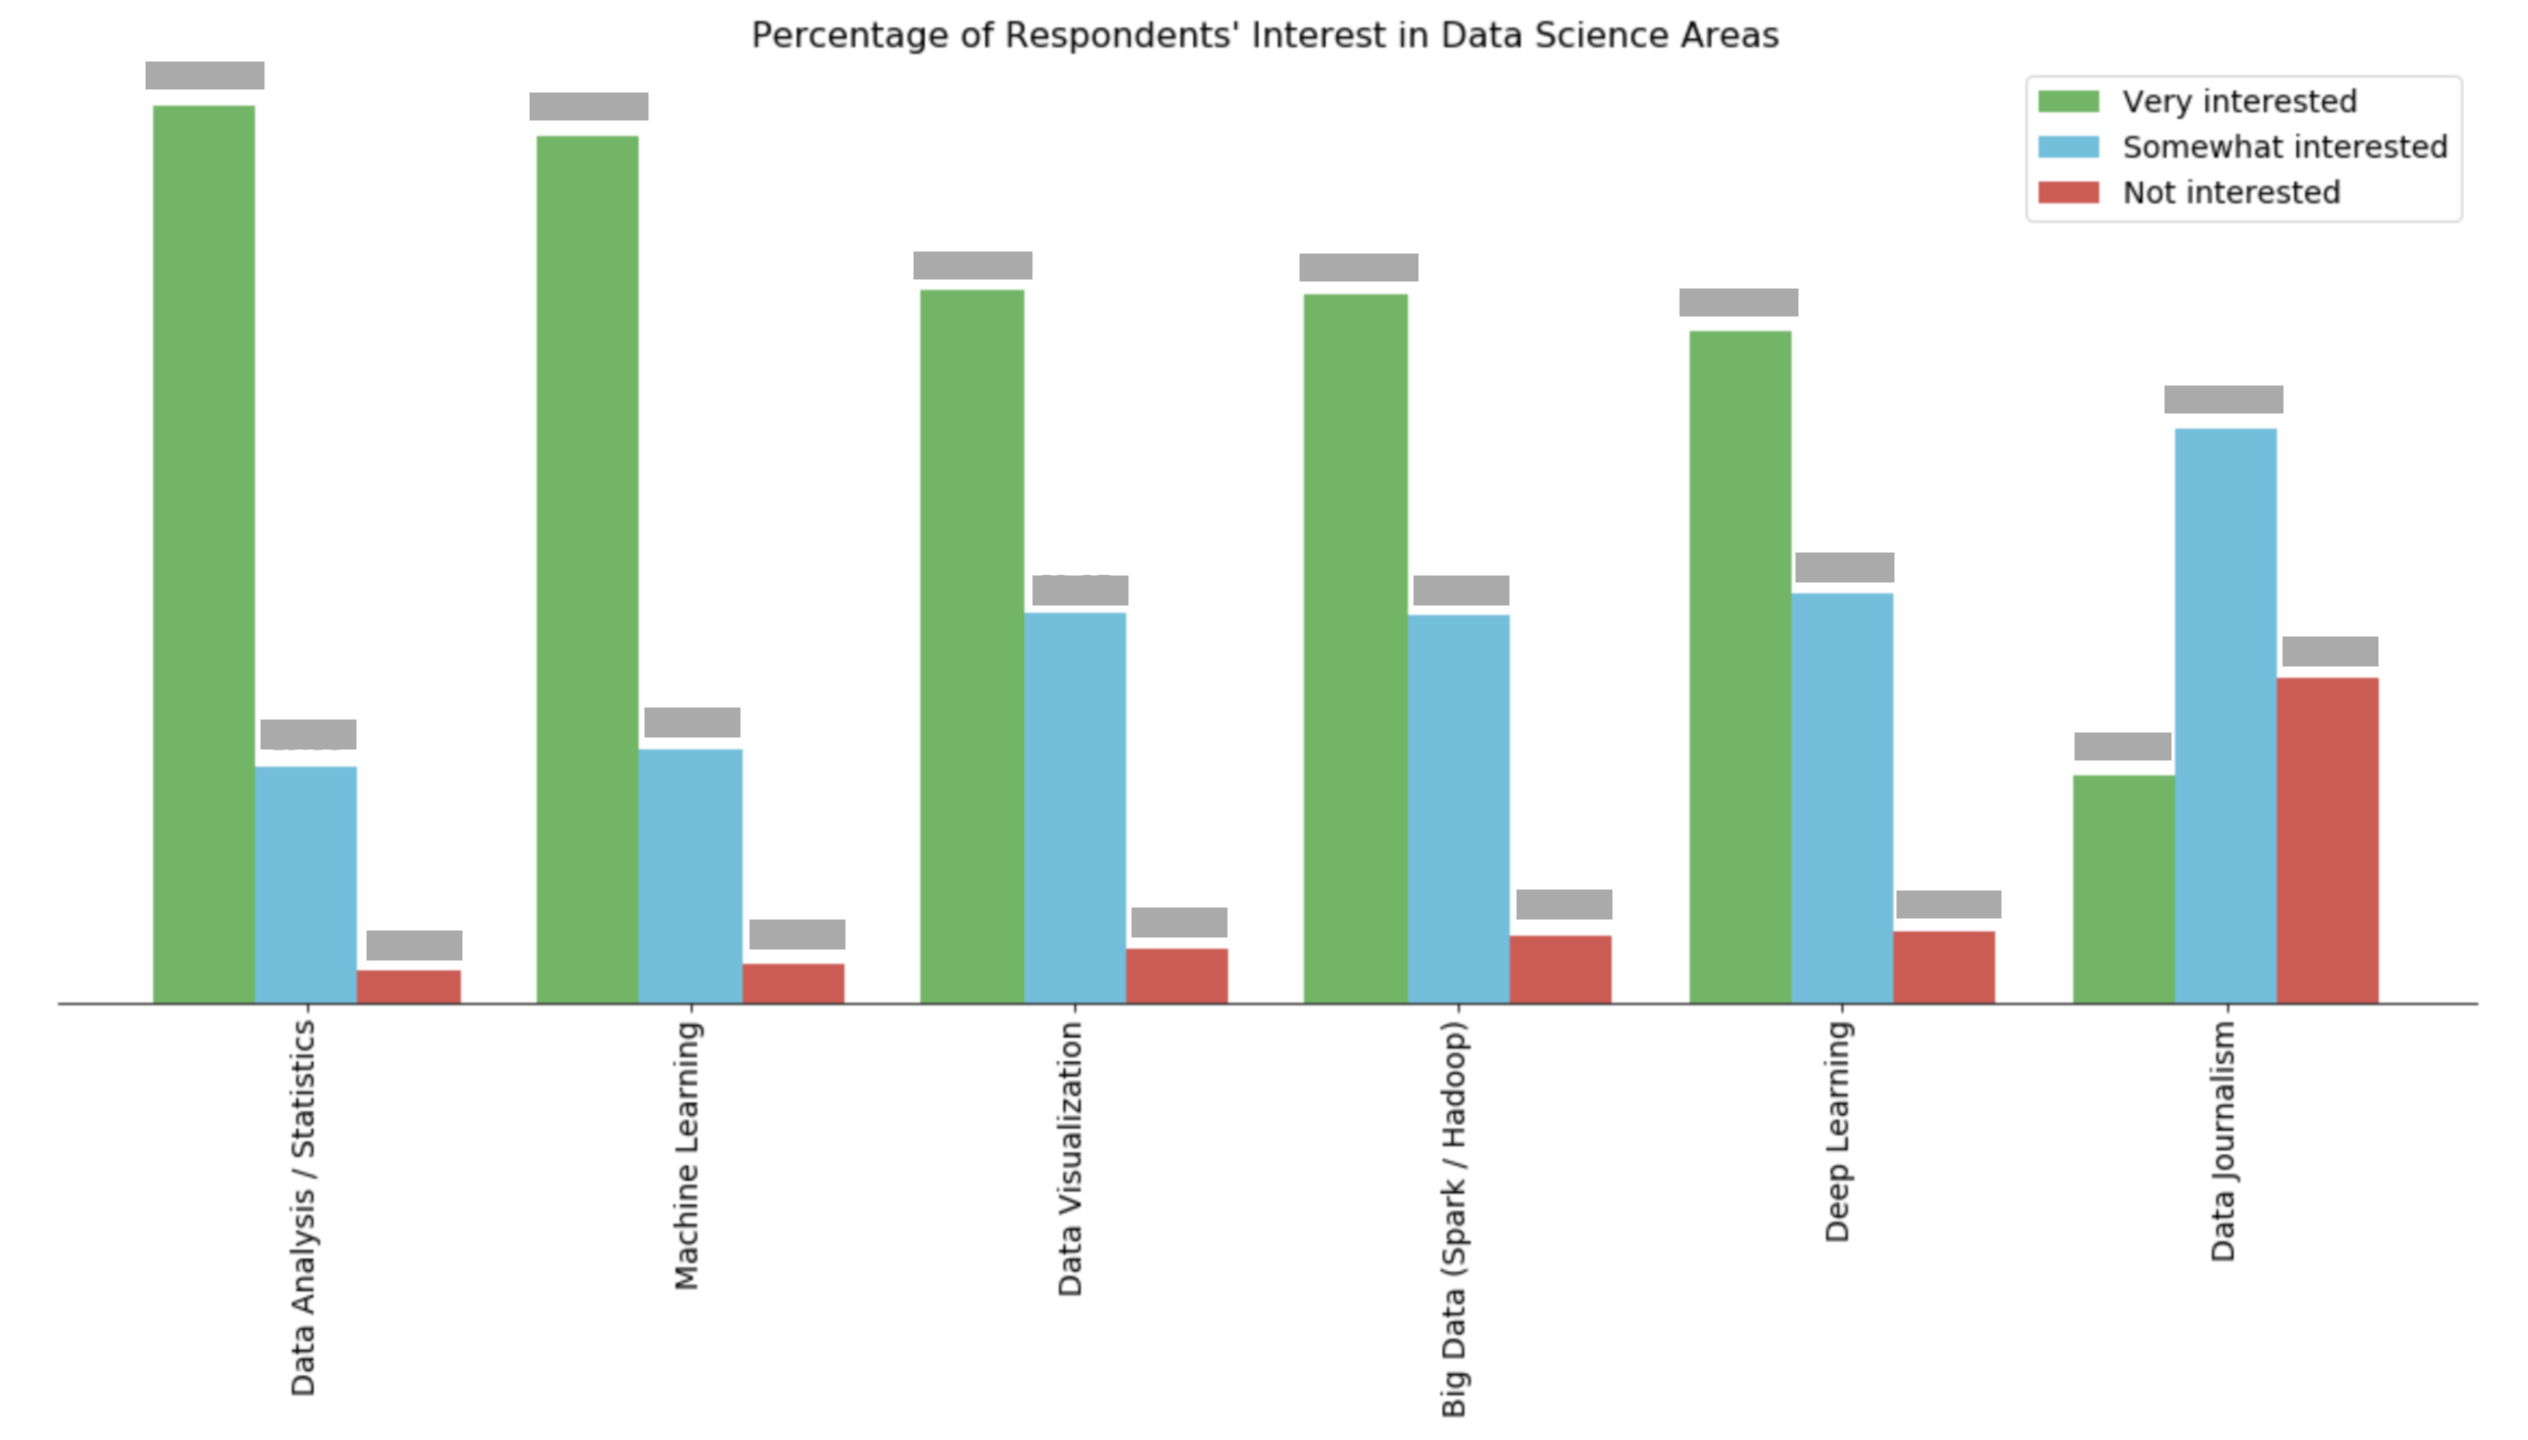

## Answer to Question 2

In [4]:
df_survey.sort_values(['Very interested'], ascending = False, inplace = True)
df_percent = round((df_survey/2233 * 100), 2)

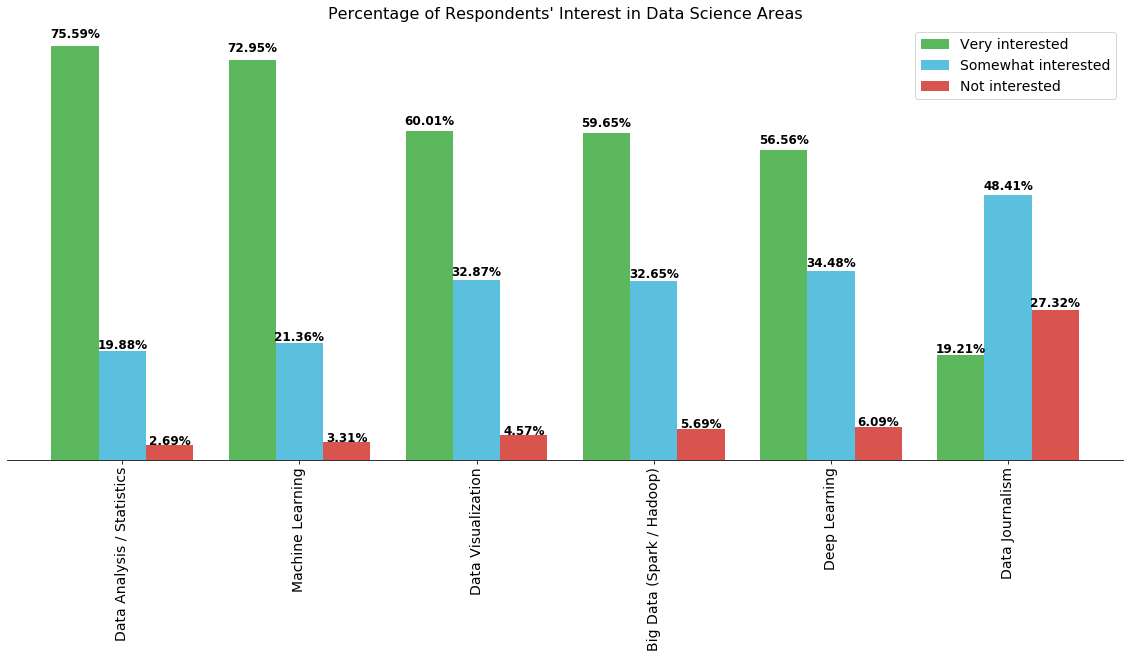

In [5]:
# Bar chart plotting
ax = df_percent.plot(
                    kind='bar', 
                    width = 0.8, 
                    figsize=(20, 8),
                    color=['#5cb85c', '#5bc0de', '#d9534f']
                    )

# Labels and axes font size adjustment 
plt.title('Percentage of Respondents\' Interest in Data Science Areas', size = 16)
plt.xticks(fontsize=14) 
plt.yticks([]) 
plt.legend(fontsize=14) 

# Adding percentage values of the survey on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{(height)}'+'%', (x + width/2, y + height*1.02), ha='center', weight="bold", size = 12)
    
# Removing the top, left and right border of the chart
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

## Question 3

You are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes (including all the 39 crime type categories).

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

Central, Southern, Bayview, Mission, Park, Richmond, Ingleside, Taraval, Northern, and, Tenderloin.

Convert the San Francisco dataset, which you can also find here, [San Francisco dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/Police_Department_Incidents_-_Previous_Year__2016_.zip) , into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

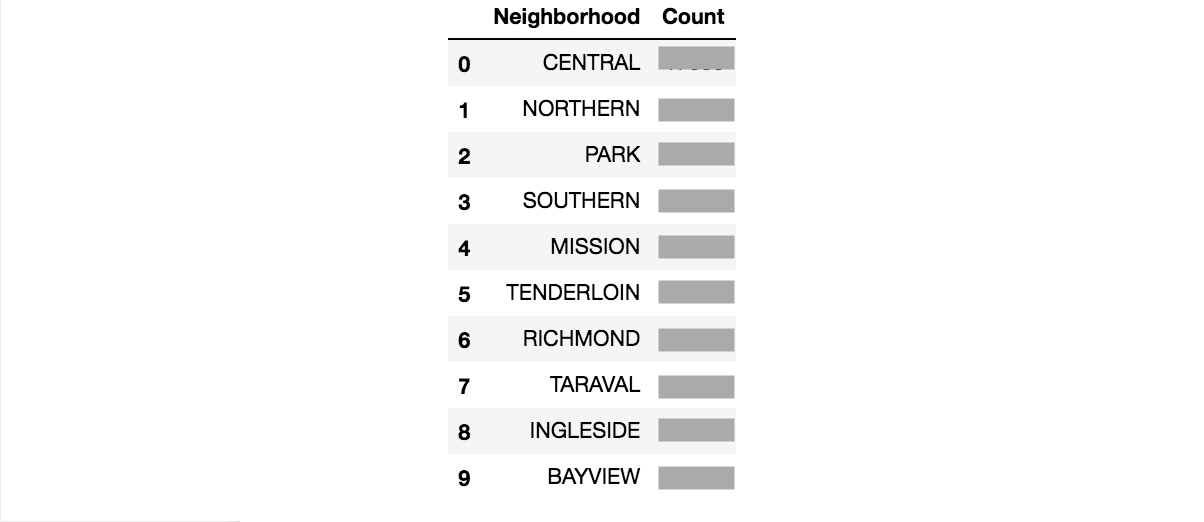

## Answer to Question 3

In [6]:
df_SFincidents = pd.read_csv('https://drive.google.com/uc?export=download&id=1nlqKjl3CB005V789MR1yTQ-psBY36yar')

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
print('Dimension (row, col) =', df_SFincidents.shape)
print()
df_SFincidents.head()

Dimension (row, col) = (150500, 13)



,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [8]:
df_SFneighbor = df_SFincidents['PdDistrict'].value_counts().to_frame().reset_index()
df_SFneighbor.rename(columns = {'index':'Neighborhood', 'PdDistrict' : 'Count'}, inplace = True)

df_SFneighbor

,Neighborhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


## Question 4

Now you should be ready to proceed with creating the Choropleth map.

If you follow the lab on Choropleth maps and use the [GeoJSON](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/san-francisco.geojson) correctly, you should be able to generate the following map

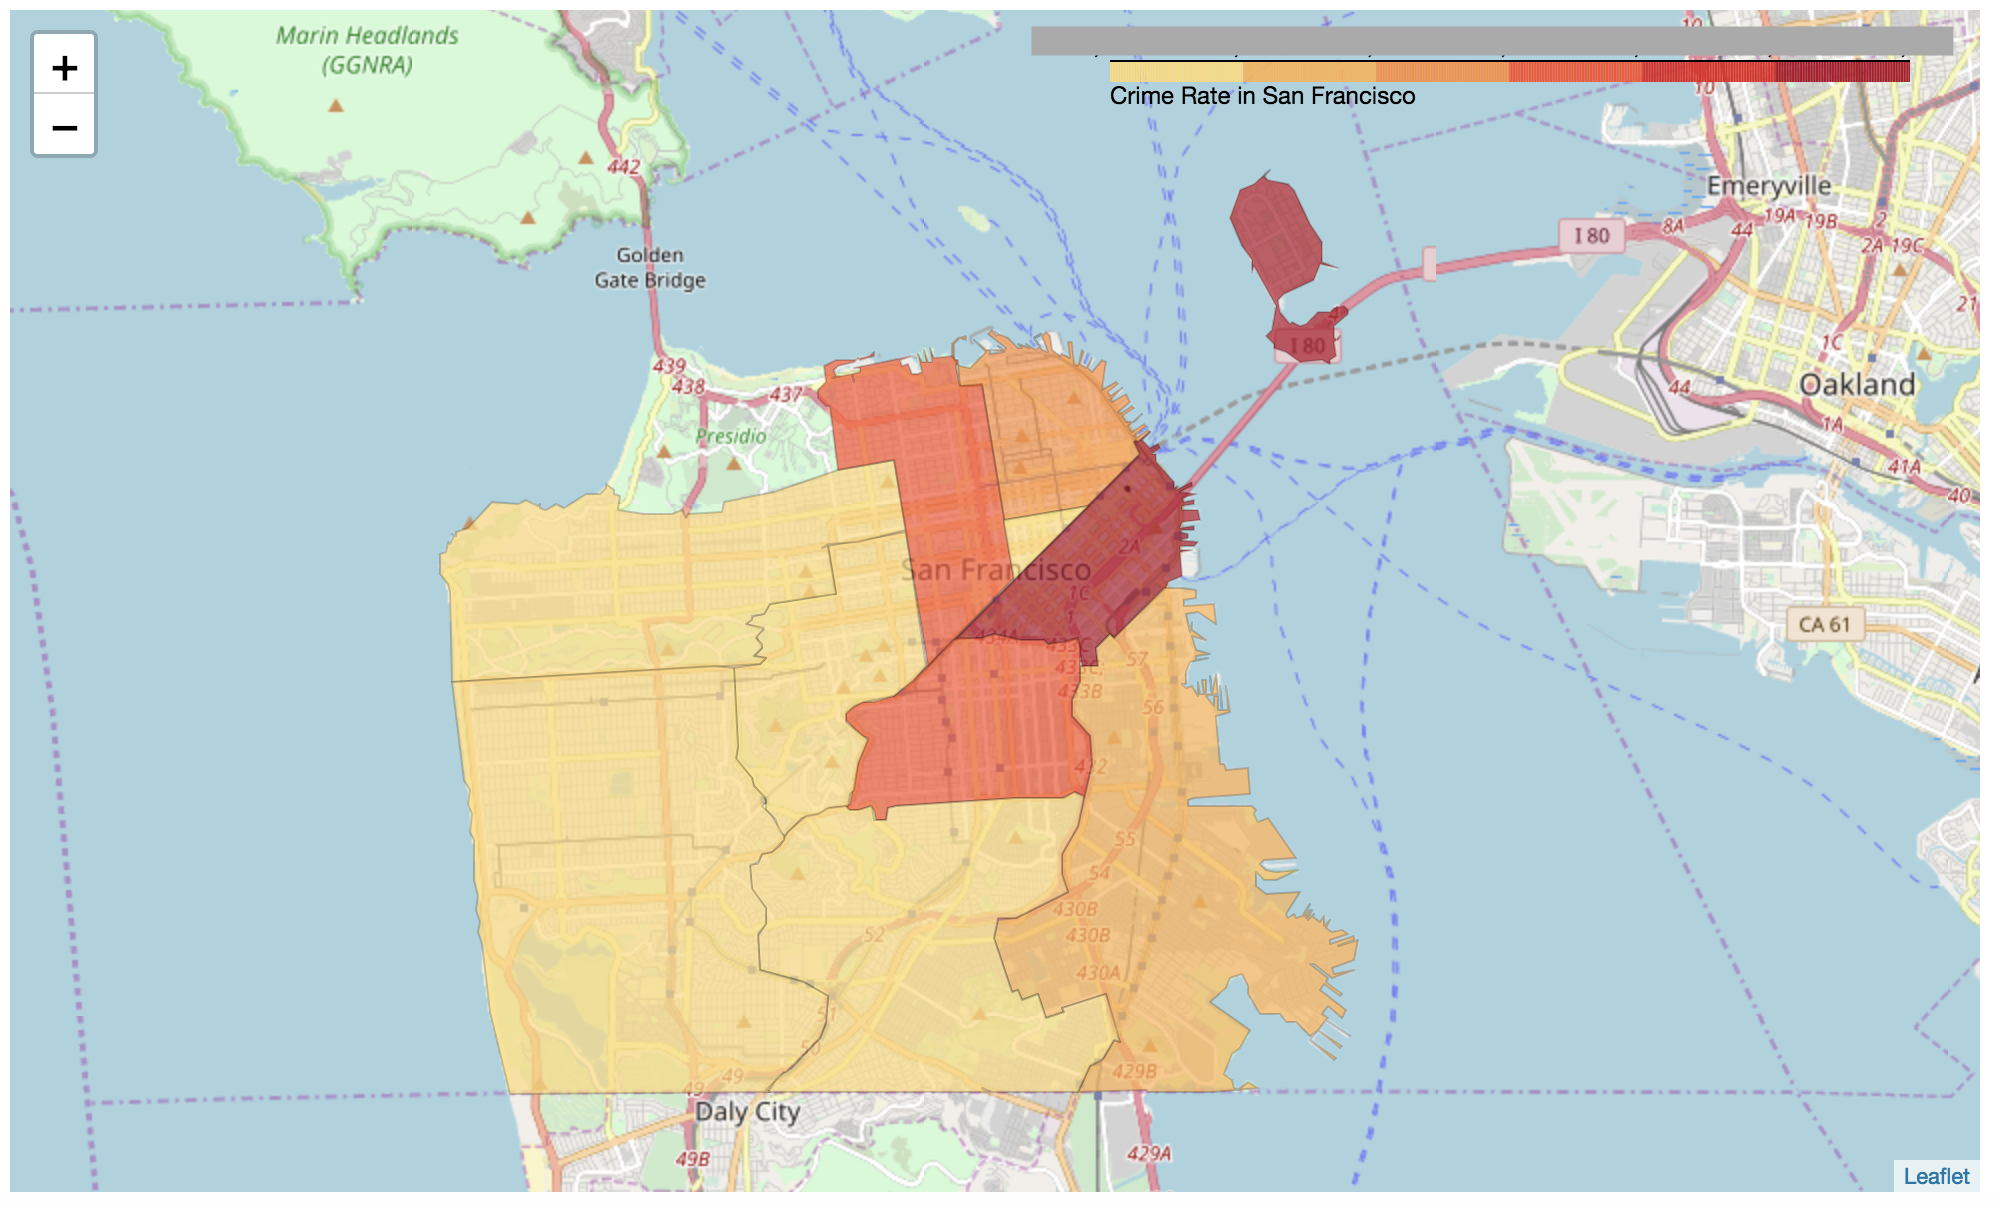

## Answer to Question 4

In [9]:
sanfran_geo = r'san-francisco.geojson'
sanfran_map = folium.Map(location=[37.77, -122.42], zoom_start = 12)

folium.Choropleth(
    geo_data=sanfran_geo,
    data=df_SFneighbor,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
).add_to(sanfran_map)

# display map
sanfran_map

## Author

[Temitope Adesusi](https://www.linkedin.com/in/ttadesusi/)